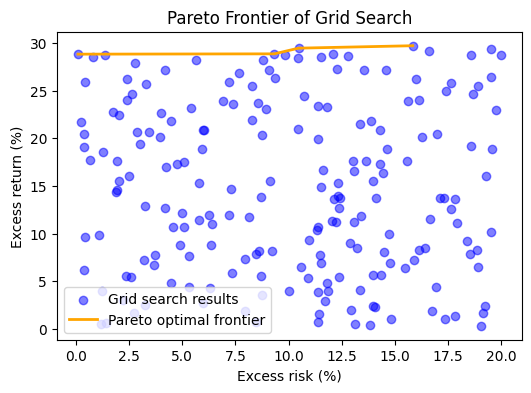

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example: fake grid search results (replace with actual)
np.random.seed(0)
risks = np.random.rand(200) * 0.2   # between 0 and 20%
returns = np.random.rand(200) * 0.3 # between 0 and 30%

points = np.column_stack([risks, returns])

# --- Compute Pareto frontier ---
def pareto_frontier(points):
    # Sort by risk (x), then by return (y)
    points = points[points[:,0].argsort()]
    frontier = []
    max_return = -np.inf
    for r, ret in points:
        if ret > max_return:
            frontier.append((r, ret))
            max_return = ret
    return np.array(frontier)

frontier = pareto_frontier(points)

# --- Plot ---
plt.figure(figsize=(6,4))
plt.scatter(points[:,0]*100, points[:,1]*100, c="blue", alpha=0.5, label="Grid search results")
plt.plot(frontier[:,0]*100, frontier[:,1]*100, c="orange", linewidth=2, label="Pareto optimal frontier")
plt.xlabel("Excess risk (%)")
plt.ylabel("Excess return (%)")
plt.title("Pareto Frontier of Grid Search")
plt.legend()
plt.show()


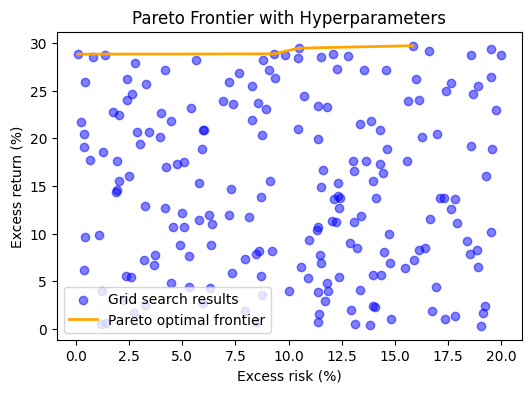

Risk=0.001, Return=0.288, Params=(np.float64(0.1), np.float64(0.01))
Risk=0.093, Return=0.289, Params=(np.float64(10.0), np.float64(10.0))
Risk=0.105, Return=0.295, Params=(np.float64(0.01), np.float64(0.1))
Risk=0.158, Return=0.297, Params=(np.float64(0.01), np.float64(0.01))


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Example: fake grid search results
# (replace with actual risk, return, and hyperparams from solving your problem)
np.random.seed(0)
n_points = 200
risks = np.random.rand(n_points) * 0.2    # excess risk (0–20%)
returns = np.random.rand(n_points) * 0.3  # excess return (0–30%)
# Suppose hyperparameters are two numbers (e.g., lambda1, lambda2)
hyperparams = [(np.random.choice([0.01, 0.1, 1, 10]),
                np.random.choice([0.01, 0.1, 1, 10])) for _ in range(n_points)]

# Store as structured list
points = [{"risk": r, "return": ret, "params": hp}
          for r, ret, hp in zip(risks, returns, hyperparams)]

# --- Pareto frontier extraction ---
def pareto_frontier(points):
    # Sort by risk
    sorted_points = sorted(points, key=lambda d: d["risk"])
    frontier = []
    max_return = -np.inf
    for p in sorted_points:
        if p["return"] > max_return:
            frontier.append(p)
            max_return = p["return"]
    return frontier

frontier = pareto_frontier(points)

# --- Plot ---
plt.figure(figsize=(6,4))
plt.scatter([p["risk"]*100 for p in points],
            [p["return"]*100 for p in points],
            c="blue", alpha=0.5, label="Grid search results")
plt.plot([p["risk"]*100 for p in frontier],
         [p["return"]*100 for p in frontier],
         c="orange", linewidth=2, label="Pareto optimal frontier")
plt.xlabel("Excess risk (%)")
plt.ylabel("Excess return (%)")
plt.title("Pareto Frontier with Hyperparameters")
plt.legend()
plt.show()

# --- Inspect frontier results ---
for p in frontier:
    print(f"Risk={p['risk']:.3f}, Return={p['return']:.3f}, Params={p['params']}")
